# Part II - Advanced EDA and Baseline Modeling

This notebook is a continuation of the LinkedIn Preliminary EDA. In the previous notebook, we explored the LinkedIn Job Postings data from 2023, and motivated by the following question:

> How do different job attributes affect the number of views for a job posting? Which job attribute should companies emphasize to raise more views? Which job attribute do job applicants prioritize when searching for a job?

We cleaned the data and conducted some basic EDA to begin answering tis quesiton.

Now we will conduct further analysis through advanced EDA and preprocessing to prepare a dataframe for modeling.

Author: JJ Park

Date: 26/03/2024

### Dataset

### Table of Contents

1. Data Dictionary
2. Data Loading
3. Data Preprocessing - Feature Engineering
4. Basic Model Preprocessing
5. Modeling - Linear Regression
6. Modeling - Random Forest Regressor
7. Summary

### Data Dictionary

1. `job_id`: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/{ job_id })
2. `company_id`: Identifier for the company associated with the job posting (maps to companies.csv)
3. `title`: Job title
4. `description`: Job description
5. `max_salary`: Maximum salary
6. `med_salary`: Median salary
7. `min_salary`: Minimum salary
8. `pay_period`: Pay period for salary (Hourly, Monthly, Yearly)
9. `formatted_work_type`: Type of work (Fulltime, Parttime, Contract)
10. `location`: Job location
11. `applies`: Number of applications that have been submitted
12. `original_listed_time`: Original time the job was listed
13. `remote_allowed`: Whether job permits remote work
14. `views`: Number of times the job posting has been viewed
15. `job_posting_url`: URL to the job posting on a platform
16. `application_url`: URL where applications can be submitted
17. `application_type`: Type of application process (offsite, complex/simple onsite)
18. `expiry`: Expiration date or time for the job listing
19. `closed_time`: Time to close job listing
20. `formatted_experience_level`: Job experience level (entry, associate, executive, etc)
21. `skills_desc`: Description detailing required skills for job
22. `listed_time`: Time when the job was listed
23. `posting_domain`: Domain of the website with application
24. `sponsored`: Whether the job listing is sponsored or promoted
25. `work_type`: Type of work associated with the job
26. `currency`: Currency in which the salary is provided
27. `compensation_type`: Type of compensation for the job
28. `scraped`: Has been scraped by `details_retriever`

### Loading the Data

Let's begin by importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [3]:
# Read in the cleaned data from previous notebook
df = pd.read_csv('../Data/clean_linkedin_job_posting.csv')

Let's check the cleaned dataset.

In [4]:
# Check the first few rows
df.head()

,job_id,company_id,title,description,med_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,application_type,expiry,formatted_experience_level,listed_time,sponsored,reposted,skills_present,application_portal
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5250.00,MONTHLY,Full-time,"Little River, SC",5.0,2023-11-04 05:26:40,0.0,9.0,OffsiteApply,2023-12-04 03:53:20,Entry level,2023-11-04 05:26:40,0,0,0,1
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,73028.00,Not Specified,Full-time,"Beaver Dam, WI",5.0,2023-11-04 02:40:00,0.0,16.0,OffsiteApply,2023-12-04 03:53:20,Not Specified,2023-11-04 02:40:00,0,0,0,1
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,73028.00,Not Specified,Full-time,"Bessemer, AL",5.0,2023-11-04 02:40:00,0.0,16.0,OffsiteApply,2023-12-04 03:53:20,Not Specified,2023-11-04 02:40:00,0,0,1,1
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,22.27,HOURLY,Full-time,"Aliso Viejo, CA",5.0,2023-11-04 02:40:00,0.0,1.0,OffsiteApply,2023-12-04 03:53:20,Entry level,2023-11-04 02:40:00,0,0,0,1
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",240895.00,YEARLY,Full-time,United States,5.0,2023-11-02 20:06:40,1.0,16.0,OffsiteApply,2023-12-04 03:53:20,Mid-Senior level,2023-11-04 05:26:40,0,1,0,1


In [5]:
df.shape

(33246, 20)

Let's ensure that the data is actually clean.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   location                    33246 non-null  object 
 8   applies                     33246 non-null  float64
 9   original_listed_time        33246 non-null  object 
 10  remote_allowed              33246 non-null  float64
 11  views                       33246 non-null  float64
 12  application_type            33246 non-null  object 
 13  expiry                      332

We can observe the following:
- The range index is correct and we have 33246 rows with 20 columns. 10 of the latter are string and 10 are numerical.
- No null information in rows.

Let's ensure that there is genuinely no null data.

In [7]:
df.isna().sum()

job_id                        0
company_id                    0
title                         0
description                   0
med_salary                    0
pay_period                    0
formatted_work_type           0
location                      0
applies                       0
original_listed_time          0
remote_allowed                0
views                         0
application_type              0
expiry                        0
formatted_experience_level    0
listed_time                   0
sponsored                     0
reposted                      0
skills_present                0
application_portal            0
dtype: int64

Checking the abovem we see that the dataset is clean with no missing values as we addressed them in our previous notebook.

Let's also check for duplicates.

In [8]:
df.duplicated().sum()

0

There are no duplicates either. Now we can conduct some advanced EDA and data preprocessing for modeling. Let's start by looking at some categorical variables.

### Data Preprocessing

First, let's separate variables by their respective data types.

In [9]:
df.select_dtypes(["object"]).columns

Index(['title', 'description', 'pay_period', 'formatted_work_type', 'location',
       'original_listed_time', 'application_type', 'expiry',
       'formatted_experience_level', 'listed_time'],
      dtype='object')

There are 10 categorical variables in the dataset. Let's check for numerical ones.

In [10]:
df.select_dtypes(["float", "int"]).columns

Index(['job_id', 'company_id', 'med_salary', 'applies', 'remote_allowed',
       'views', 'sponsored', 'reposted', 'skills_present',
       'application_portal'],
      dtype='object')

There are 10 numerical variables in the dataset.

As part of the advanced EDA, we will conduct some feature engineering to convert all the categorical variables into numerical variables. We will leave out the `title` and `description` columns for now as we plan on conducting various text analysis tasks to extract insights and patterns from the text data. 

### Categorical Variables

First, let's take a look at `application_type` column.

In [11]:
df['application_type'].value_counts()

application_type
OffsiteApply          20104
ComplexOnsiteApply    10723
SimpleOnsiteApply      2419
Name: count, dtype: int64

As we can see from above, there are three categories. For the simplicity, we will combine the "ComplexOnsiteApply" and "SimpleOnsiteApply" categories into a single category. Essentially, we are creating a binary column where "OffsiteApply" will be represented by the entries of 0, and "OnsiteApply" will be represented by the entries of 1.

In [12]:
df['application_method'] = df['application_type'].map({'OffsiteApply': 0, 'ComplexOnsiteApply': 1, 'SimpleOnsiteApply': 1})

In [13]:
# Check
df['application_method'].value_counts()

application_method
0    20104
1    13142
Name: count, dtype: int64

Now drop the non binarized `application_type` column.

In [14]:
df.drop(columns='application_type', inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   location                    33246 non-null  object 
 8   applies                     33246 non-null  float64
 9   original_listed_time        33246 non-null  object 
 10  remote_allowed              33246 non-null  float64
 11  views                       33246 non-null  float64
 12  expiry                      33246 non-null  object 
 13  formatted_experience_level  332

Next we will look at `location`.

In [15]:
df['location'].value_counts()

location
United States         2341
New York, NY           818
Chicago, IL            534
Houston, TX            444
Dallas, TX             383
                      ... 
Edmonds, WA              1
Crawfordsville, IN       1
Winter Park, CO          1
Claremont, NC            1
Fergus Falls, MN         1
Name: count, Length: 4621, dtype: int64

As we can see, majority of the job postings were published from the United States, specified by popular cities within the United States. Our task is to extract country information to minimize the number of categories within the dataset. Let's separate the `location` data into two categories, United States and non-United States. 

In [16]:
# Create a new column 'is_usa' with binary values
def check_usa(location):
    if 'United States' in str(location):
        return 1
    elif ',' in str(location):
        return 1  # Assume it's in the USA if there's a comma (likely a city-state pair)
    else:
        return 0

df['is_usa'] = df['location'].apply(check_usa)

# Display the DataFrame with the new column
df['is_usa'].value_counts()

is_usa
1    31692
0     1554
Name: count, dtype: int64

Here, we have created a binary column called `is_usa`, which showcases whether the jobs were posted from the United States or not. Let's create a visualization to display the distribution of location, USA vs non-USA.

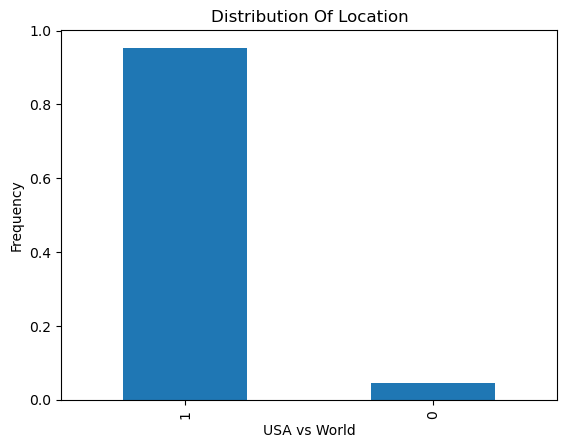

In [17]:
plt.figure()
df['is_usa'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Location'.title())
plt.xlabel("USA vs World")
plt.ylabel("Frequency")
plt.show()

As expected, majority of the job postings were from the US (roughly 95 percent), and the rest of the world (5 percent) were responsible for a small portion of job postings. Now we will drop the non-binarized `location` column.

In [18]:
df.drop(columns='location', inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   applies                     33246 non-null  float64
 8   original_listed_time        33246 non-null  object 
 9   remote_allowed              33246 non-null  float64
 10  views                       33246 non-null  float64
 11  expiry                      33246 non-null  object 
 12  formatted_experience_level  33246 non-null  object 
 13  listed_time                 332

The `location` column has been dropped. We will shift our focus to time variables, including `original_listed_time`, `expiry` and `listed_time`. 

In [19]:
df['original_listed_time'].value_counts()

original_listed_time
2023-11-03 18:20:00    5005
2023-11-03 15:33:20    4958
2023-08-22 17:33:20    3798
2023-08-22 14:46:40    3407
2023-11-02 20:06:40    2398
2023-08-22 20:20:00    1578
2023-08-23 18:33:20    1536
2023-08-21 19:20:00    1365
2023-11-03 21:06:40     993
2023-11-03 23:53:20     908
2023-08-23 21:20:00     854
2023-08-24 00:06:40     726
2023-08-23 15:46:40     685
2023-11-02 17:20:00     654
2023-11-01 19:06:40     325
2023-10-09 18:20:00     314
2023-11-04 02:40:00     308
2023-07-28 17:33:20     219
2023-08-24 02:53:20     206
2023-11-03 12:46:40     203
2023-08-22 00:53:20     196
2023-10-09 15:33:20     166
2023-08-20 21:06:40     155
2023-07-30 00:06:40     109
2023-07-29 18:33:20     100
2023-10-09 23:53:20      96
2023-08-24 05:40:00      96
2023-10-31 18:06:40      85
2023-10-31 15:20:00      76
2023-08-21 13:46:40      73
2023-08-22 12:00:00      69
2023-10-08 17:20:00      62
2023-10-31 12:33:20      61
2023-08-10 13:53:20      57
2023-10-09 12:46:40      52

In [20]:
df['expiry'].value_counts()

expiry
2023-12-03 16:46:40    6978
2023-09-21 17:00:00    4043
2023-12-03 14:00:00    3671
2023-09-22 18:00:00    2716
2023-09-21 19:46:40    2527
2023-12-03 19:33:20    1746
2023-09-21 14:13:20    1717
2023-09-22 23:33:20    1360
2023-12-03 22:20:00    1175
2023-12-02 18:33:20    1161
2023-12-04 01:06:40    1042
2023-09-22 20:46:40     819
2023-09-23 02:20:00     458
2024-05-01 15:00:00     358
2024-02-18 16:00:00     319
2024-05-01 17:46:40     250
2024-02-18 13:13:20     215
2024-02-19 19:46:40     174
2023-09-21 03:06:40     169
2023-09-23 05:06:40     156
2024-05-01 20:33:20     122
2024-02-19 17:00:00     114
2023-09-21 00:20:00     111
2024-02-18 18:46:40     108
2023-12-04 03:53:20      87
2023-09-21 22:33:20      86
2023-09-22 12:26:40      85
2023-09-22 01:20:00      83
2023-09-22 15:13:20      67
2023-09-20 16:00:00      60
2023-12-02 13:00:00      54
2023-12-03 11:13:20      52
2024-02-19 22:33:20      49
2023-12-04 06:40:00      48
2024-04-28 14:46:40      48
2023-12-02 15

In [21]:
df['listed_time'].value_counts()

listed_time
2023-11-03 18:20:00    6910
2023-11-03 15:33:20    5465
2023-08-22 17:33:20    4550
2023-08-22 14:46:40    3189
2023-08-23 18:33:20    2561
2023-08-24 00:06:40    1389
2023-11-03 23:53:20    1328
2023-08-22 20:20:00    1216
2023-11-03 21:06:40    1138
2023-08-23 21:20:00     947
2023-11-02 17:20:00     795
2023-08-23 15:46:40     686
2023-11-04 02:40:00     643
2023-11-02 20:06:40     464
2023-08-24 02:53:20     300
2023-08-22 00:53:20     286
2023-08-22 23:06:40     123
2023-08-24 05:40:00     121
2023-08-23 13:00:00      99
2023-08-21 13:46:40      86
2023-11-03 12:46:40      81
2023-11-04 05:26:40      74
2023-10-31 15:20:00      73
2023-10-31 18:06:40      69
2023-08-23 10:13:20      68
2023-10-31 12:33:20      48
2023-11-02 14:33:20      47
2023-08-23 01:53:20      40
2023-08-10 16:40:00      39
2023-08-10 13:53:20      38
2023-10-31 09:46:40      37
2023-11-04 08:13:20      37
2023-11-03 10:00:00      35
2023-11-03 01:40:00      29
2023-08-22 12:00:00      28
2023-08-

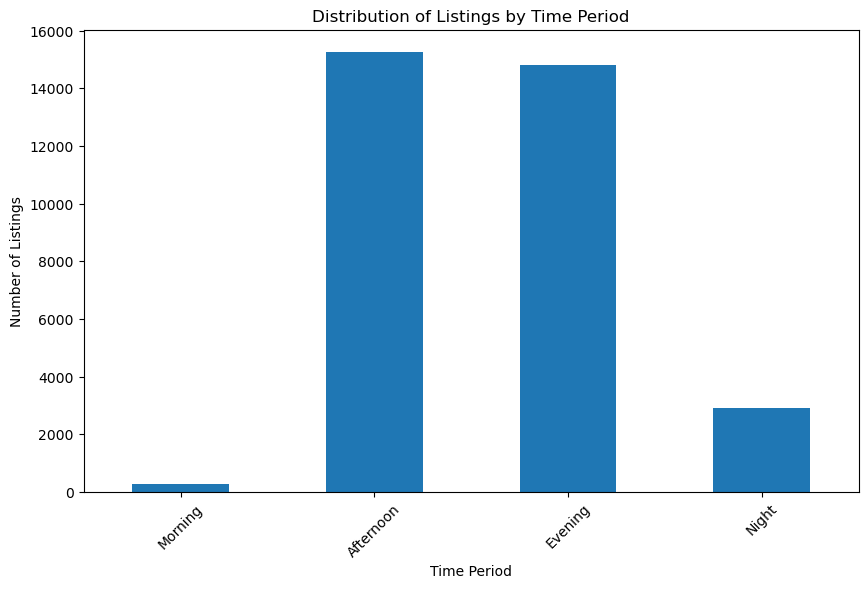

In [22]:
df['listed_time'] = pd.to_datetime(df['listed_time'])

# Define time periods
time_periods = {
    'Morning': (pd.Timestamp('06:00:00').time(), pd.Timestamp('11:59:59').time()),
    'Afternoon': (pd.Timestamp('12:00:00').time(), pd.Timestamp('17:59:59').time()),
    'Evening': (pd.Timestamp('18:00:00').time(), pd.Timestamp('23:59:59').time()),
    'Night': (pd.Timestamp('00:00:00').time(), pd.Timestamp('05:59:59').time())
}

# Categorize listed_time into time periods
for period, (start, end) in time_periods.items():
    df[period] = df['listed_time'].apply(lambda x: start <= x.time() <= end)

# Plot distribution of each time period
time_period_counts = df[['Morning', 'Afternoon', 'Evening', 'Night']].sum()
time_period_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Listings by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

We can observe that all of the time variables are in the standard datetime format as we addressed them in the previous notebook. From the `listed_time` column, we can observe that majority of the jobs were posted from late afternoon to evening time period. Further analysis would be desired to unveil a relationship between the time job post is listed and number of views. However, since the dataset has limited amount of information regarding time (data collected over the period of two days, in two different months, 4 days in total), we cannot draw meaningful insights from such a limited set of time data. Let's create dummy variables where we separate the timestamp into 'year', 'month', 'day', 'hour', 'minute' and 'second'.

In [23]:
# Convert the timestamp columns to datetime format
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'])
df['expiry'] = pd.to_datetime(df['expiry'])
df['listed_time'] = pd.to_datetime(df['listed_time'])

In [24]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  33246 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   med_salary                  33246 non-null  float64       
 5   pay_period                  33246 non-null  object        
 6   formatted_work_type         33246 non-null  object        
 7   applies                     33246 non-null  float64       
 8   original_listed_time        33246 non-null  datetime64[ns]
 9   remote_allowed              33246 non-null  float64       
 10  views                       33246 non-null  float64       
 11  expiry                      33246 non-null  datetime64

All three time variables are now in the datetime format. We will proceed with extracting year, month, day, hour, minute, and second into separate columns.

In [25]:
# Extract year, month, day, hour, minute, and second into separate columns
df['original_listed_year'] = df['original_listed_time'].dt.year
df['original_listed_month'] = df['original_listed_time'].dt.month
df['original_listed_day'] = df['original_listed_time'].dt.day
df['original_listed_hour'] = df['original_listed_time'].dt.hour
df['original_listed_minute'] = df['original_listed_time'].dt.minute
df['original_listed_second'] = df['original_listed_time'].dt.second

df['expiry_year'] = df['expiry'].dt.year
df['expiry_month'] = df['expiry'].dt.month
df['expiry_day'] = df['expiry'].dt.day
df['expiry_hour'] = df['expiry'].dt.hour
df['expiry_minute'] = df['expiry'].dt.minute
df['expiry_second'] = df['expiry'].dt.second

df['listed_year'] = df['listed_time'].dt.year
df['listed_month'] = df['listed_time'].dt.month
df['listed_day'] = df['listed_time'].dt.day
df['listed_hour'] = df['listed_time'].dt.hour
df['listed_minute'] = df['listed_time'].dt.minute
df['listed_second'] = df['listed_time'].dt.second

In [26]:
df.sample(50)

,job_id,company_id,title,description,med_salary,pay_period,formatted_work_type,applies,original_listed_time,remote_allowed,views,expiry,formatted_experience_level,listed_time,sponsored,reposted,skills_present,application_portal,application_method,is_usa,Morning,Afternoon,Evening,Night,original_listed_year,original_listed_month,original_listed_day,original_listed_hour,original_listed_minute,original_listed_second,expiry_year,expiry_month,expiry_day,expiry_hour,expiry_minute,expiry_second,listed_year,listed_month,listed_day,listed_hour,listed_minute,listed_second
23160,3699056816,26873.0,Assistant Manager,What’s in it for you !\nWe offer eligible Emp...,22.000,HOURLY,Full-time,5.0,2023-08-22 20:20:00,0.0,2.0,2023-09-22 23:33:20,Mid-Senior level,2023-08-24 00:06:40,0,1,0,1,0,1,False,False,False,True,2023,8,22,20,20,0,2023,9,22,23,33,20,2023,8,24,0,6,40
23693,3697393567,6078.0,Audit Senior Associate I Commercial Business G...,Status Category:\nFull-Time\nExempt/Non-Exempt...,100000.000,YEARLY,Full-time,1.0,2023-08-22 20:20:00,0.0,4.0,2023-09-21 19:46:40,Mid-Senior level,2023-08-22 20:20:00,1,0,0,1,0,1,False,False,True,False,2023,8,22,20,20,0,2023,9,21,19,46,40,2023,8,22,20,20,0
6503,3757462244,213746.0,Warehouse Operations Manager,Warehouse Operations ManagerWarehouse Operatio...,75000.000,YEARLY,Full-time,5.0,2023-11-03 15:33:20,0.0,23.0,2023-12-03 14:00:00,Mid-Senior level,2023-11-03 15:33:20,0,0,0,0,1,1,False,True,False,False,2023,11,3,15,33,20,2023,12,3,14,0,0,2023,11,3,15,33,20
16336,3749346377,1409798.0,MEP Mechanical Engineer,"Job Overview:As an Mechanical Engineer, you wi...",100000.000,YEARLY,Full-time,10.0,2023-11-03 15:33:20,0.0,37.0,2023-12-03 14:00:00,Mid-Senior level,2023-11-03 15:33:20,0,0,0,0,1,0,False,True,False,False,2023,11,3,15,33,20,2023,12,3,14,0,0,2023,11,3,15,33,20
2892,3757725828,19073.0,Senior Financial Analyst,A hybrid work arrangement working three (3) da...,73028.000,Not Specified,Full-time,3.0,2023-11-03 18:20:00,0.0,50.0,2023-12-03 16:46:40,Associate,2023-11-03 18:20:00,1,0,0,0,0,1,False,False,True,False,2023,11,3,18,20,0,2023,12,3,16,46,40,2023,11,3,18,20,0
24191,3697386061,884316.0,1st Shift - Mig Weld - Pay Starts $ $19.76/hour,Summary of Responsibilities: \nResponsible for...,73028.000,Not Specified,Full-time,5.0,2023-08-22 17:33:20,0.0,16.0,2023-09-21 19:46:40,Associate,2023-08-22 17:33:20,1,0,0,1,0,1,False,True,False,False,2023,8,22,17,33,20,2023,9,21,19,46,40,2023,8,22,17,33,20
27937,3693588344,1681.0,Talent Manager,Our Talent Managers work in a team environment...,73028.000,Not Specified,Full-time,36.0,2023-08-23 18:33:20,0.0,106.0,2023-09-22 18:00:00,Mid-Senior level,2023-08-23 18:33:20,0,0,0,0,1,1,False,False,True,False,2023,8,23,18,33,20,2023,9,22,18,0,0,2023,8,23,18,33,20
17308,3719144141,16690.0,Senior Quality Assurance Automation Engineer,o Strong skill set with 3 plus years of experi...,73028.000,Not Specified,Full-time,19.0,2023-11-03 18:20:00,0.0,44.0,2023-12-03 16:46:40,Mid-Senior level,2023-11-03 18:20:00,0,0,0,0,1,1,False,False,True,False,2023,11,3,18,20,0,2023,12,3,16,46,40,2023,11,3,18,20,0
32276,3693045800,25461.0,Storage Engineer,JOB SUMMARY FOR STORAGE ENGINEER:Installs new ...,61.000,HOURLY,Contract,5.0,2023-08-22 14:46:40,0.0,198.0,2023-09-21 17:00:00,Associate,2023-08-22 14:46:40,0,0,0,0,1,1,False,True,False,False,2023,8,22,14,46,40,2023,9,21,17,0,0,2023,8,22,14,46,40
2511,3757731798,908113.0,Dental Hygienist,Overview\n\nAre you passionate about providing...,73028.000,Not Specified,Full-time,5.0,2023-11-01 08:00:00,0.0,16.0,2023-12-03 19:33:20,Entry level,2023-11-03 18:20:00,0,1,0,1,0,1,False,False,True,False,2023,11,1,8,0,0,2023,12,3,19,33,20,2023,11,3,18,20,0


In [27]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  33246 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33246 non-null  object        
 4   med_salary                  33246 non-null  float64       
 5   pay_period                  33246 non-null  object        
 6   formatted_work_type         33246 non-null  object        
 7   applies                     33246 non-null  float64       
 8   original_listed_time        33246 non-null  datetime64[ns]
 9   remote_allowed              33246 non-null  float64       
 10  views                       33246 non-null  float64       
 11  expiry                      33246 non-null  datetime64

All the time elements have been successfully extracted and sorted into columns respective to their time variables. Now we can drop the three original time variables: `original_listed_time`, `expiry` and `listed_time`.

In [28]:
# Drop the original_listed_time, expiry, and listed_time columns
df.drop(['original_listed_time', 'expiry', 'listed_time', 'Morning', 'Afternoon', 'Evening', 'Night'], axis=1, inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   applies                     33246 non-null  float64
 8   remote_allowed              33246 non-null  float64
 9   views                       33246 non-null  float64
 10  formatted_experience_level  33246 non-null  object 
 11  sponsored                   33246 non-null  int64  
 12  reposted                    33246 non-null  int64  
 13  skills_present              332

The three time variables have been dropped. Now we will adopt one-hot encoding method to introduce dummy variables that can replace the leftover categorical variables. 

In [29]:
pd.get_dummies(df.select_dtypes('object')).shape

(33246, 52577)

From above, we can observe that several new dummy variables have been introduced, a column for each category in each feature. The column size has increased from 36 to 52577, and this is mostly due to `title` and `description` as these variables hold a lot of features. 

In [30]:
df['title'].value_counts()

title
Sales Director [Owner/Operator]                                              120
Sales Manager                                                                 99
Project Manager                                                               97
Customer Service Representative                                               85
Senior Accountant                                                             83
                                                                            ... 
Senior Manager, Indirect Procurement                                           1
CDL A Delivery Driver                                                          1
Additional Design, Strategy, Writing, Project Management, and other Roles      1
Sales Executive - New Jersey                                                   1
Shipping & Receiving Associate 2nd shift (Beaver Dam)                          1
Name: count, Length: 22404, dtype: int64

In [31]:
df['description'].value_counts()

description
The Entrepreneur we seek is an experienced sales professional and a natural-born closer who lives for the thrill of the hunt and making serious bank. If you want the freedom to obliterate your business goals and keep the profits you generate, then you’ve come to the right place. If you’re a people magnet and use your gift of persuasion to optimize your network - then keep reading. You’re going to love it at City Lifestyle.\nOur next Business to Business Sales Executive will enjoy building a book of residual income. The hard charger we’re seeking doesn’t sit around waiting for the phone to ring or inbox to ding. They know to make serious money, they gotta have a hit list and get after it. Prioritizing opportunities and juggling dozens of touch points at once will be paramount. Activities drive outcomes, and follow-through is key. \nIf you’re not ready to blow up the phones, go face to face, network, and build out your portfolio fast, then don’t waste your energy. You’ll spen

The `title` and `description` columns together account for 52557 features out of 52577 newly created dummy variables. Since these two text-heavy variables are flooding the number of columns, we will conduct baseline modeling without these two columns.

In [32]:
# Drop title and description columns
df.drop(['title', 'description'], axis=1, inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   med_salary                  33246 non-null  float64
 3   pay_period                  33246 non-null  object 
 4   formatted_work_type         33246 non-null  object 
 5   applies                     33246 non-null  float64
 6   remote_allowed              33246 non-null  float64
 7   views                       33246 non-null  float64
 8   formatted_experience_level  33246 non-null  object 
 9   sponsored                   33246 non-null  int64  
 10  reposted                    33246 non-null  int64  
 11  skills_present              33246 non-null  int64  
 12  application_portal          33246 non-null  int64  
 13  application_method          332

Now we can regenerate our dataframe with the dummy variables included.

In [33]:
pd.get_dummies(df)

,job_id,company_id,med_salary,applies,remote_allowed,views,sponsored,reposted,skills_present,application_portal,application_method,is_usa,original_listed_year,original_listed_month,original_listed_day,original_listed_hour,original_listed_minute,original_listed_second,expiry_year,expiry_month,expiry_day,expiry_hour,expiry_minute,expiry_second,listed_year,listed_month,listed_day,listed_hour,listed_minute,listed_second,pay_period_HOURLY,pay_period_MONTHLY,pay_period_Not Specified,pay_period_ONCE,pay_period_WEEKLY,pay_period_YEARLY,formatted_work_type_Contract,formatted_work_type_Full-time,formatted_work_type_Internship,formatted_work_type_Other,formatted_work_type_Part-time,formatted_work_type_Temporary,formatted_work_type_Volunteer,formatted_experience_level_Associate,formatted_experience_level_Director,formatted_experience_level_Entry level,formatted_experience_level_Executive,formatted_experience_level_Internship,formatted_experience_level_Mid-Senior level,formatted_experience_level_Not Specified
0,3757940104,553718.0,5250.00,5.0,0.0,9.0,0,0,0,1,0,1,2023,11,4,5,26,40,2023,12,4,3,53,20,2023,11,4,5,26,40,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,3757940025,2192142.0,73028.00,5.0,0.0,16.0,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,3757938019,474443.0,73028.00,5.0,0.0,16.0,0,0,1,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3,3757938018,18213359.0,22.27,5.0,0.0,1.0,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,3757937095,437225.0,240895.00,5.0,1.0,16.0,0,1,0,1,0,1,2023,11,2,20,6,40,2023,12,4,3,53,20,2023,11,4,5,26,40,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,73028.00,5.0,0.0,16.0,0,0,0,0,1,1,2023,8,23,18,33,20,2023,9,22,20,46,40,2023,8,23,18,33,20,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
33242,108965123,45091.0,73028.00,2.0,0.0,4.0,0,0,0,0,1,1,2023,11,3,15,33,20,2023,12,3,14,0,0,2023,11,3,15,33,20,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
33243,102339515,52132271.0,73028.00,5.0,0.0,16.0,0,0,0,0,1,0,2023,11,3,18,20,0,2023,12,3,16,46,40,2023,11,3,18,20,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
33244,85008768,74363360.0,48880.00,5.0,0.0,5.0,1,0,0,0,1,1,2023,8,22,20,20,0,2024,2,18,18,46,40,2023,8,22,20,20,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True


In [34]:
pd.get_dummies(df).shape

(33246, 50)

We can see that now we only have 50 columns instead of previous 52577.

In [35]:
pd.get_dummies(df).dtypes

job_id                                           int64
company_id                                     float64
med_salary                                     float64
applies                                        float64
remote_allowed                                 float64
views                                          float64
sponsored                                        int64
reposted                                         int64
skills_present                                   int64
application_portal                               int64
application_method                               int64
is_usa                                           int64
original_listed_year                             int32
original_listed_month                            int32
original_listed_day                              int32
original_listed_hour                             int32
original_listed_minute                           int32
original_listed_second                           int32
expiry_yea

The preprocessing has been completed. We can now proceed to baseline modeling.

### Basic Modeling Preprocessing

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway
from scipy import stats
import random
from itertools import combinations
from scipy.stats import kruskal
import scikit_posthocs as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor

In [37]:
#Converting categorical columns to dummy variables
dummy_df = pd.get_dummies(df, drop_first=True)
dummy_df.head()

,job_id,company_id,med_salary,applies,remote_allowed,views,sponsored,reposted,skills_present,application_portal,application_method,is_usa,original_listed_year,original_listed_month,original_listed_day,original_listed_hour,original_listed_minute,original_listed_second,expiry_year,expiry_month,expiry_day,expiry_hour,expiry_minute,expiry_second,listed_year,listed_month,listed_day,listed_hour,listed_minute,listed_second,pay_period_MONTHLY,pay_period_Not Specified,pay_period_ONCE,pay_period_WEEKLY,pay_period_YEARLY,formatted_work_type_Full-time,formatted_work_type_Internship,formatted_work_type_Other,formatted_work_type_Part-time,formatted_work_type_Temporary,formatted_work_type_Volunteer,formatted_experience_level_Director,formatted_experience_level_Entry level,formatted_experience_level_Executive,formatted_experience_level_Internship,formatted_experience_level_Mid-Senior level,formatted_experience_level_Not Specified
0,3757940104,553718.0,5250.00,5.0,0.0,9.0,0,0,0,1,0,1,2023,11,4,5,26,40,2023,12,4,3,53,20,2023,11,4,5,26,40,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,3757940025,2192142.0,73028.00,5.0,0.0,16.0,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,3757938019,474443.0,73028.00,5.0,0.0,16.0,0,0,1,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,3757938018,18213359.0,22.27,5.0,0.0,1.0,0,0,0,1,0,1,2023,11,4,2,40,0,2023,12,4,3,53,20,2023,11,4,2,40,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,3757937095,437225.0,240895.00,5.0,1.0,16.0,0,1,0,1,0,1,2023,11,2,20,6,40,2023,12,4,3,53,20,2023,11,4,5,26,40,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False


In [38]:
# Correlation matrix
correlation_matrix = dummy_df.corr()

In [39]:
# Diagonal creation
diagonal_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
diagonal_corr_matrix = diagonal_corr_matrix.fillna(0)

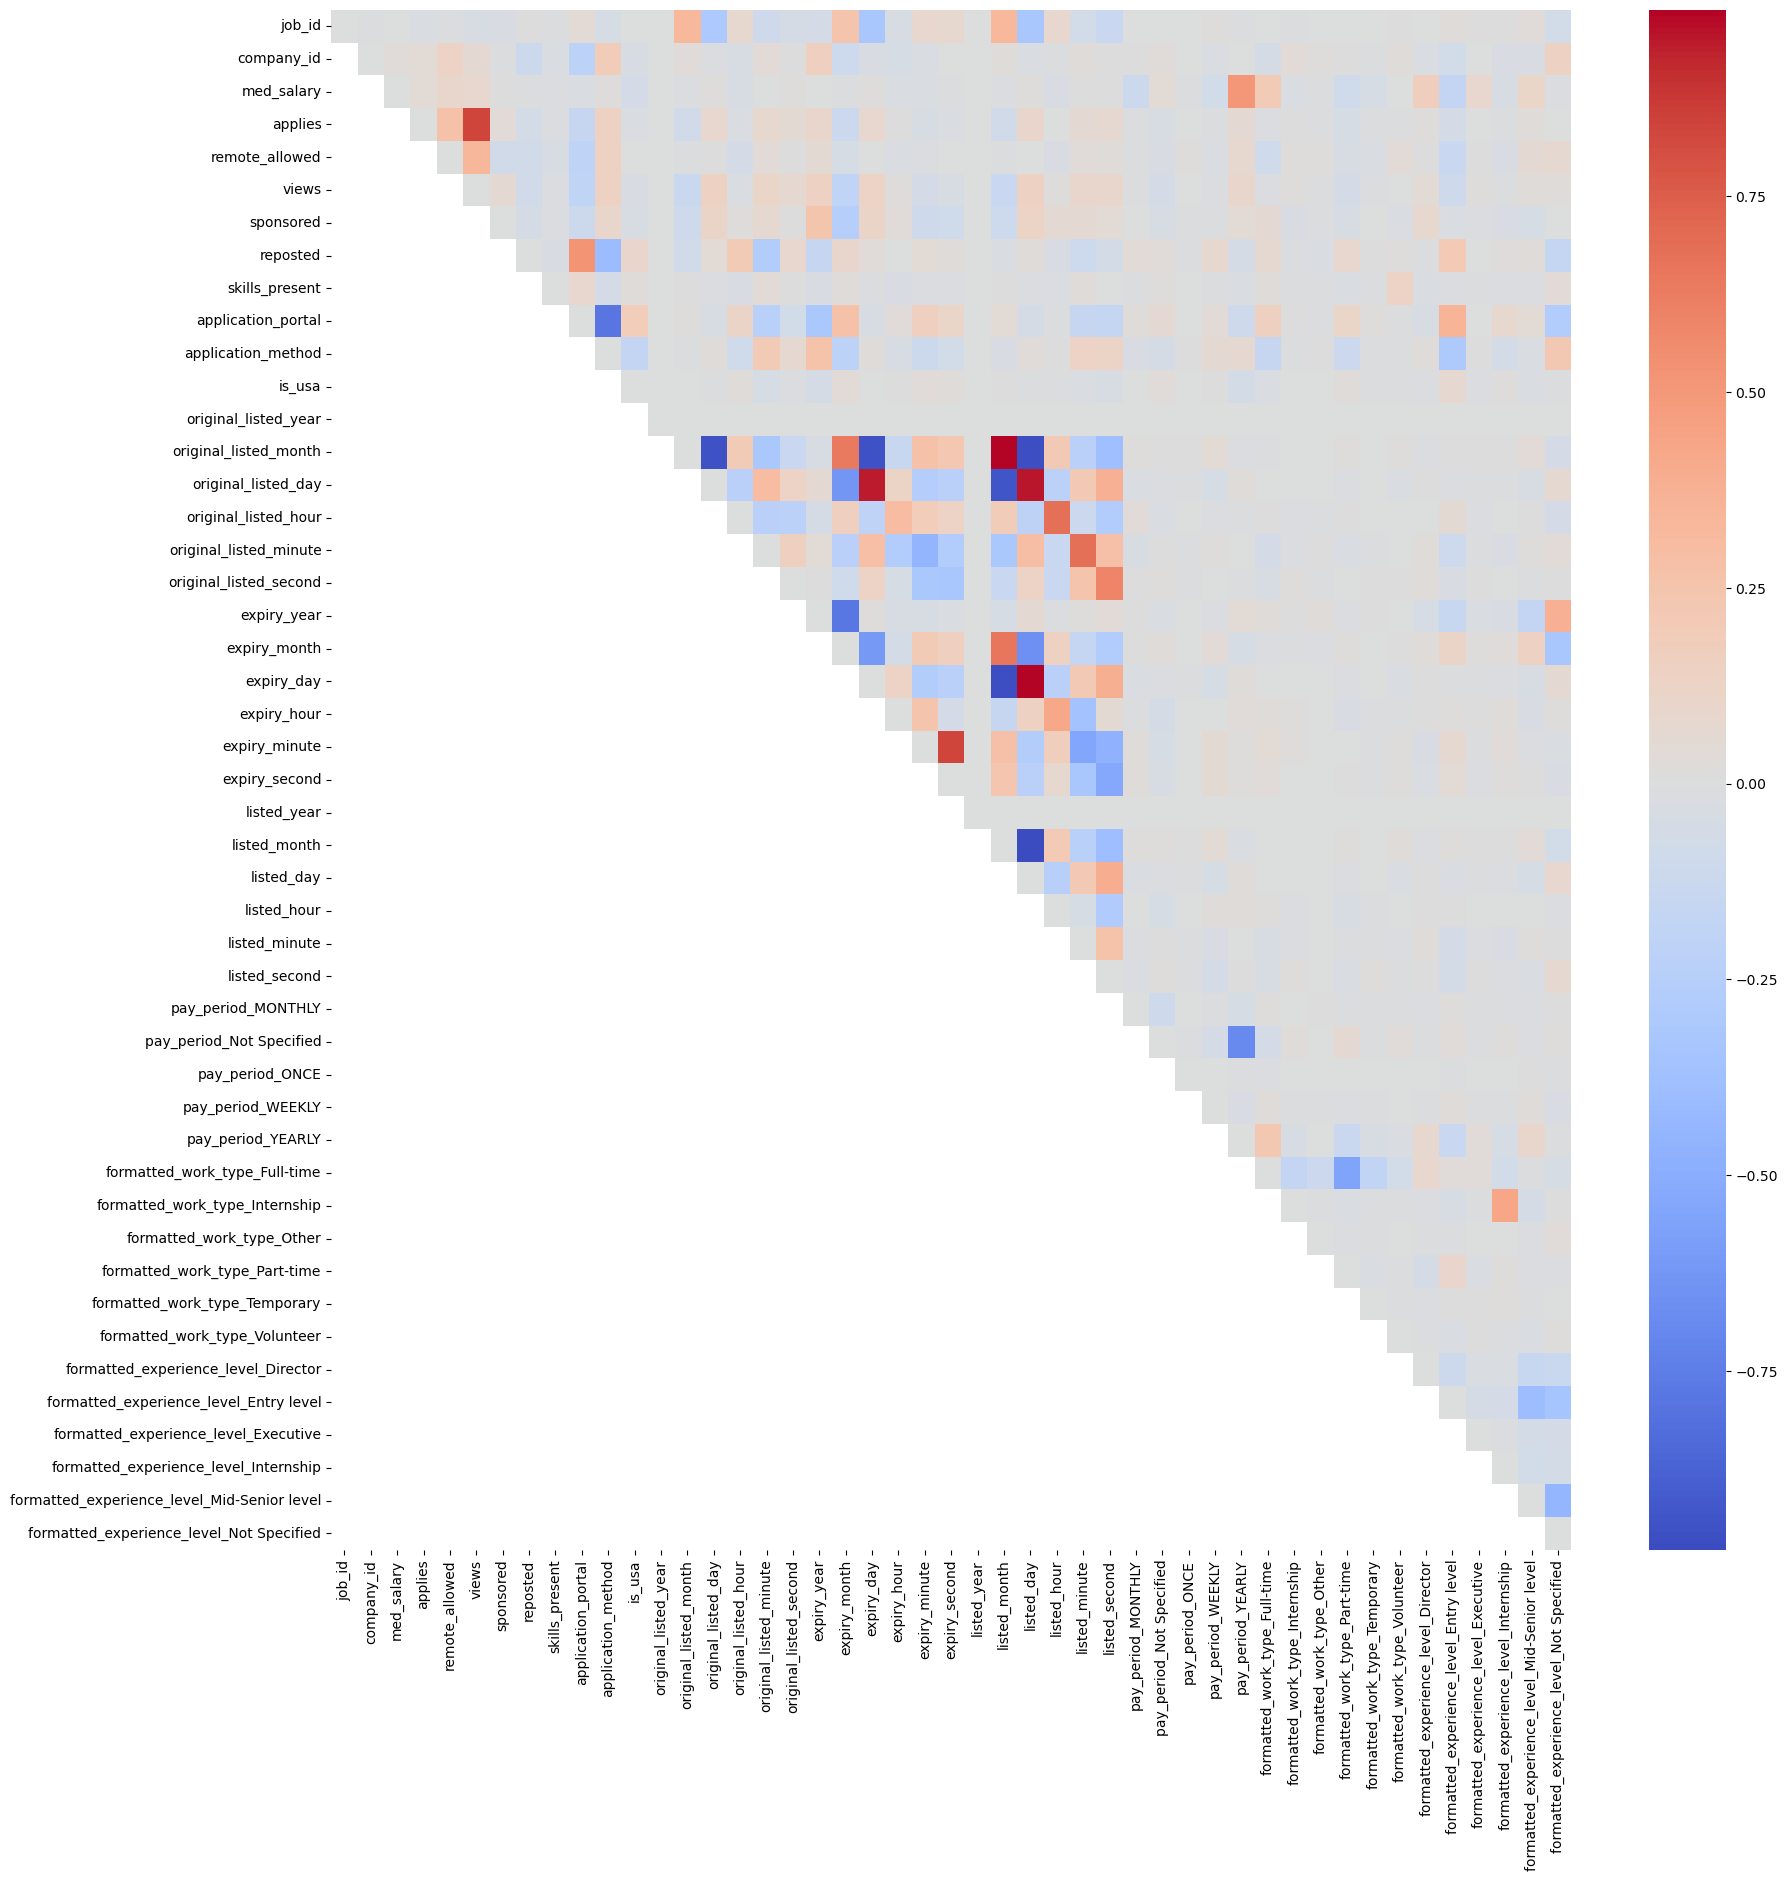

In [40]:
# Heatmap
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(diagonal_corr_matrix, dtype=bool))
sns.heatmap(diagonal_corr_matrix, annot=False, cmap='coolwarm', cbar=True, mask=~mask)
plt.show()

In [41]:
dummy_df.columns

Index(['job_id', 'company_id', 'med_salary', 'applies', 'remote_allowed',
       'views', 'sponsored', 'reposted', 'skills_present',
       'application_portal', 'application_method', 'is_usa',
       'original_listed_year', 'original_listed_month', 'original_listed_day',
       'original_listed_hour', 'original_listed_minute',
       'original_listed_second', 'expiry_year', 'expiry_month', 'expiry_day',
       'expiry_hour', 'expiry_minute', 'expiry_second', 'listed_year',
       'listed_month', 'listed_day', 'listed_hour', 'listed_minute',
       'listed_second', 'pay_period_MONTHLY', 'pay_period_Not Specified',
       'pay_period_ONCE', 'pay_period_WEEKLY', 'pay_period_YEARLY',
       'formatted_work_type_Full-time', 'formatted_work_type_Internship',
       'formatted_work_type_Other', 'formatted_work_type_Part-time',
       'formatted_work_type_Temporary', 'formatted_work_type_Volunteer',
       'formatted_experience_level_Director',
       'formatted_experience_level_Entry level',

In [42]:
dummy_df.shape

(33246, 47)

In [43]:
# Filter for correlations above 0.5
high_corr_pairs = diagonal_corr_matrix[abs(diagonal_corr_matrix) > 0.5]

# Iterate through the high correlation pairs and print them
for column1 in high_corr_pairs.columns:
    for column2 in high_corr_pairs.index:
        correlation = high_corr_pairs[column1][column2]
        if not np.isnan(correlation):
            print(f"Pair: {column1} - {column2}, Correlation: {correlation}")

Pair: views - applies, Correlation: 0.8396113664855541
Pair: application_portal - reposted, Correlation: 0.5206987801892337
Pair: application_method - application_portal, Correlation: -0.7867652344126389
Pair: original_listed_day - original_listed_month, Correlation: -0.9543645585243554
Pair: expiry_month - original_listed_month, Correlation: 0.640660529134756
Pair: expiry_month - original_listed_day, Correlation: -0.627579841296167
Pair: expiry_month - expiry_year, Correlation: -0.7810139780236086
Pair: expiry_day - original_listed_month, Correlation: -0.9547259360754257
Pair: expiry_day - original_listed_day, Correlation: 0.9443682555989429
Pair: expiry_day - expiry_month, Correlation: -0.615781656750487
Pair: expiry_second - expiry_minute, Correlation: 0.840305681845824
Pair: listed_month - original_listed_month, Correlation: 0.9873303807987701
Pair: listed_month - original_listed_day, Correlation: -0.9331815684866911
Pair: listed_month - expiry_month, Correlation: 0.655415956980197

There are several columns which has high collinearity. We have to conduct feature selection while doing linear regression. Hence, for now we will stick with vanilla baseline modeling with linear regression.

In [44]:
# Set up the dependent and independent variable X and y
X = dummy_df.drop(columns=['views'])
y = dummy_df['views']

In [45]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train.shape

(23272, 46)

In [47]:
X_test.shape

(9974, 46)

In [48]:
y_train.shape

(23272,)

In [49]:
y_test.shape

(9974,)

## Linear Regression

Prior to running a linear regression, we will remove pairs of columns that reported high collinearity to find the best scores.

In [ ]:
# This is a Function to train and evaluate linear regression with column removal
def evaluate_model(X_train, X_test, y_train, y_test, columns_to_remove):
    
    # Removing specified columns
    X_train_filtered = X_train.drop(columns=[col for col in columns_to_remove if col in X_train.columns])
    X_test_filtered = X_test.drop(columns=[col for col in columns_to_remove if col in X_test.columns])

    #Scalling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_filtered)
    X_test_scaled = scaler.transform(X_test_filtered)

    # Fitting a linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions on training and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate MAE for training and test sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    return mae_train, mae_test


# List of numerical columns for evaluation (These are the highly correlated columns.)
numerical_cols = ['applies', 'application_portal', 'reposted', 'application_method',
                  'original_listed_day', 'original_listed_month', 'expiry_month', 
                   'expiry_year', 'expiry_day', 'expiry_second', 'expiry_minute',
                  'listed_month', 'listed_day', 'listed_hour', 'original_listed_hour',
                  'original_listed_minute', 'listed_minute', 'listed_second', 'pay_period_YEARLY',
                  'original_listed_second', 'med_salary', 'pay_period_Not Specified',
                  'formatted_work_type_Part-time',
                  'formatted_work_type_Full-time']

# Initialiinge variables to keep track of the best model and its performance
best_model = None
best_mae_test = float('inf')
best_columns_removed = None

# Iterating over all possible combinations of columns to remove
for num_columns_to_remove in range(1, len(numerical_cols) + 1):
    for columns_to_remove_combination in combinations(numerical_cols, num_columns_to_remove):
        mae_train, mae_test = evaluate_model(X_train, X_test, y_train, y_test, columns_to_remove_combination)

        # Print MAPE scores for each combination
        print(f"Columns Removed: {columns_to_remove_combination}")
        print(f"MAE Train: {mae_train}")
        print(f"MAE Test: {mae_test}")
        print()

Columns Removed: ('application_method', 'listed_hour')  
MAE Train: 25.699548754830374  
MAE Test: 25.745284190220932  

Columns Removed: ('application_method', 'listed_hour')

MAPE Train: 3.097998556370336

MAPE Test: 3.1696269026661237

Above is one of the combinations where the MAPE test is lowest and difference between MAPE test and train is low.

In [ ]:
X2 = dummy_df.drop(columns=["views", 'application_method', 'listed_hour'])
y2 = dummy_df['views']
# Splitting the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

Before we run the model, let's scale the test and train set first.

In [ ]:
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [ ]:
#linear regression model
model = LinearRegression()
# Training the model on the training data
model.fit(X_train_scaled2, y_train2)
# Making predictions on the testing set
y_pred_test2 = model.predict(X_test_scaled2)
# Making predictions on the training set
y_pred_train2 = model.predict(X_train_scaled2)
# Evaluating the model using MAE y_pred_train
mae_train2 = mean_absolute_error(y_train2, y_pred_train2)
print(f"MAE TRAIN: {mae_train2}")
# Evaluating the model using RMSE y_pred_test
mae_test2 = mean_absolute_error(y_test2, y_pred_test2)
print(f"MAE TEST: {mae_test2}")
# Calculating R-squared
r2 = r2_score(y_train2, y_pred_train2)
print(f"R-squared (R^2) value: {r2}")
# Calculating R-squared
r2 = r2_score(y_test2, y_pred_test2)
print(f"R-squared (R^2) value: {r2}")

The MAPE on the training set is less than the MAPE on the test set (3.1696 > 3.0980), hence it is not overfitted. However, the MAPE score itself is quite high as the ideal score is closer to 0. Therefore, this linear regression model is not an ideal model.

The R squared value is looks good as it is greater than 0.5 and closer to 1 (0.7133). The train R squared is higher than the test R squared, which is ideal.

In [ ]:
# Function to calculate the best fit line
def plot_best_fit_line(y_true, y_pred, ax, label):
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, label=label, color='blue')

# Plotting the scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train2, y_pred_train2, alpha=0.5, label='Data Points')
plot_best_fit_line(y_train2, y_pred_train2, plt.gca(), 'Best Fit Line')
plt.plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plotting the scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test2, y_pred_test2, alpha=0.5, label='Data Points')
plot_best_fit_line(y_test2, y_pred_test2, plt.gca(), 'Best Fit Line')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

The plot does not show a strong linear relationship along the diagonal. Ideally, the closer our best fit line is to the ideal fit line, higher the chance of predicted values matching the actual values. From the test set, we can observe that the data points tend to deviate from the accurate predictions as the ideal fit line progresses to the right. 

Let's plot the residuals now and draw more insights.

In [ ]:
# Residuals
residuals = y_test2 - y_pred_test2
# Scatter plot of predicted values against residuals
plt.scatter(y_pred_test2, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Adding a horizontal line at y=0 for reference
plt.savefig(f'Residuals.png', bbox_inches='tight')
plt.show()


The plot above displays heteroscedasticity. Let's visualize Q-Q plot to further investigate residuals.

In [ ]:
# Creating a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, plot=sns.mpl.pyplot)
plt.title('Q-Q Plot of Residuals')

plt.show()

The Q-Q plot above suggests that there might be some outliers in the dataset that are not clearly captured by the normal distribution. The tails of the distribution of the residuals seem to extend beyond what would be expected from a normal distribution.The S-shape of the plot suggests a departure from the normal distribution as the normal distribution has lighter tails, tails that mostly lie on the red line. Furthermore, the deviations from linearity in the QQ-plot indicate that the tails of the observed distribution are fatter than the tails of a normal distribution. Hence, there is excess kurtosis compared to a normal distribution, hinting that there is a heavy degree of risk due to residuals deviating from the perfect normal distribution line (red line).

Let's plot the distribution of residuals to show excess kurtosis.

In [ ]:
# Plot histogram with kernel density estimate
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals with Kernel Density Estimate')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig(f'Distribution', bbox_inches='tight')
plt.show()

In [ ]:
# Accessing the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
# Displaying the coefficients and intercept
print("Intercept:", intercept)
for feature, coef in zip(X_train2.columns, coefficients):
    print(f"{feature}: {coef:.3f}")

The coefficients provide information regarding the direction and magnitude of the relationship between each feature and our target variable, `views`. Positive coefficients suggest a positive impact on the number of views, while the negative coefficients suggest a negative impact on the number of views. The magnitude of the coefficient represents the estimated change in teh number of views for one-unit change in the corresponding feature. To improve the performance of the model, we can look into some regularization techniques like Ridge and Lasso. Cross validation is also useful to get a more robust estimate of the model performance.

In the advanced modeling, we will try to improve this linear regression model through various techniques as the current baseline model is not suitable to build a predictor model. Next, we will build a basic random forest regressor and observe the performance.

### Decision Tree

In [52]:
scores = pd.DataFrame()

max_depth_values = [3, 6, 9, 12]

# loop through the max depth values
for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)

    # scoring
    train_score = dt_model.score(X_train, y_train)
    test_score = dt_model.score(X_test, y_test)

    # append results
    new_row = {'Depth': max_depth, 'Train Score': train_score, 'Test Score': test_score}
    scores = pd.concat([scores, pd.DataFrame([new_row])], ignore_index=True)

# best parameter
best_score = scores['Test Score'].max()
print("Best test scores given by:")
print(scores[scores['Test Score'] == best_score], "\n\n")

Best test scores given by:
   Depth  Train Score  Test Score
0      3     0.243125    0.239623 




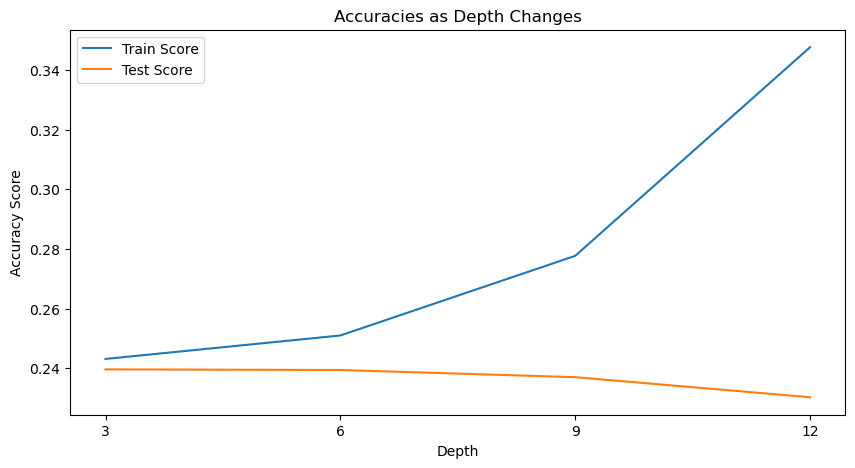

In [51]:
# comparison plot
plt.figure(figsize=(10,5))
plt.plot('Depth', 'Train Score', data=scores)
plt.plot('Depth', 'Test Score', data=scores)
plt.title('Accuracies as Depth Changes')
plt.xlabel('Depth')
plt.xticks(max_depth_values)
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

### Random Forest Regressor

In [ ]:
# Creating the model
model = RandomForestRegressor()
# Training the model on the training data
model.fit(X_train, y_train)
# Making predictions on the testing set
y_pred_test = model.predict(X_test)
# Making predictions on the training set
y_pred_train = model.predict(X_train)
# Calculating MAE for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error (MAE) for TRAIN set: {mae_train}")
# Calculating MAE for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) for TEST set: {mae_test}")
# Calculating R-squared
r2 = r2_score(y_train, y_pred_train)
print(f"R-squared (R^2) value TRAIN: {r2}")
# Calculating R-squared
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R^2) value TEST: {r2}")

The MAPE on the training set is significantly lower than the MAPE on the test set (1.6016 > 0.6270), resulting the model to be overfitted. Moreover, the R squared value seems to be pretty valid, as it is greater than 0.5, closer to 1.0, and the train R squared value is greater than test R squared value.

Let's plot a scatter plot of actual points and predicted points for both train and test sets. We will set subsample equals to 200 so that every 200th sample is plotted here.

In [ ]:
# Creating a DataFrame with actual and predicted values for the training set
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
# Creating a DataFrame with actual and predicted values for the test set
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
# Subsampling every 200th point
subsample_factor = 200
plt.figure(figsize=(6, 6))
# Creating a scatter plot for Actual values in the training set
plt.scatter(range(0, len(train_results), subsample_factor), 
            train_results['Actual'].values[::subsample_factor], 
            label='Actual', color='blue', marker='o', alpha=0.7)
# Creating a scatter plot for Predicted values in the training set
plt.scatter(range(0, len(train_results), subsample_factor), 
            train_results['Predicted'].values[::subsample_factor], 
            label='Predicted', color='orange', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values - Training Set')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
# Creating a scatter plot for Actual values in the testing set
plt.scatter(range(0, len(test_results), subsample_factor), 
            test_results['Actual'].values[::subsample_factor], 
            label='Actual', color='blue', marker='o', alpha=0.7)
# Creating a scatter plot for Predicted values in the testing set
plt.scatter(range(0, len(test_results), subsample_factor), 
            test_results['Predicted'].values[::subsample_factor], 
            label='Predicted', color='orange', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values - Testing Set')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()

Now let's plot the actual vs predicted with the best fit and ideal fit lines.

In [ ]:
# Function to calculate the best fit line
def plot_best_fit_line(y_true, y_pred, ax, label):
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, label=label, color='blue')

# Plotting the scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Data Points')
plot_best_fit_line(y_train, y_pred_train, plt.gca(), 'Best Fit Line')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plotting the scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Data Points')
plot_best_fit_line(y_test, y_pred_test, plt.gca(), 'Best Fit Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

The data points on the training set seems to be a lot closer to the ideal fit line (accurate predictions). However, as the line progresses right, the best fit line starts to deviate from the ideal fit line, and this difference suggests that the model is overfitting. Therefore, this model also needs further investigation to improve the overall performance. This can be achieved by addressing the identified limitations above, exploring feature selection techniques, and introducing more sophisticated modeling approaches to improve the predictive performance of the model.

## Summary

In this notebook, we have performed advanced EDA, such as feature engineering and modeling preprocessing to prepare a dataset ready for baseline modeling. In the following notebook, we will delve deeper into modeling by applying advanced modeling strategies and feature selection tools to enhance the model performance. We will also introduce NLP with deep learning models to add more depth to our analysis. 

This notebook continues to "Part_Three_Advanced_Modeling.ipynb" notebook in the "Notebook" file.